
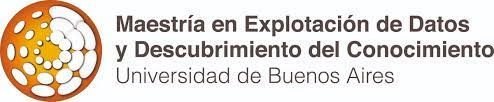


# Procesamiento de imágenes (pre TP2)

In [ ]:
!pip install clustimage
from clustimage import Clustimage
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import numpy as np
from PIL import Image

# The cv2.imshow() and cv.imshow() functions from the opencv-python package are incompatible with Jupyter notebook;
# see https://github.com/jupyter/notebook/issues/3935.
# As a replacement, you can use the following function:
from google.colab.patches import cv2_imshow

DIR = "/content/drive/MyDrive/Maestría en Ciencia de Datos - UBA/FCEN DMCyT/PreTP2/Datos"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.4/190.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 33.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Librería para manipulación de imagenes
Para operar sobre las imagenes vamos a usar la [librería de OpenCV para python](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html), que se carga como *cv2*

También existe la librería [ClustImage](https://pypi.org/project/clustimage/1.3.3/) orientada exclusivamente al clustering no supervisado de imagenes, que les puede ser útil.

## Las  imágenes son básicamente matrices
Mínimo elemento de la matriz se conoce como pixel.
Cada pixel es un dígito está entre (0,255) *(8 bits)*



## Las imágenes a color
1 dimensión más  ⟶ RGB
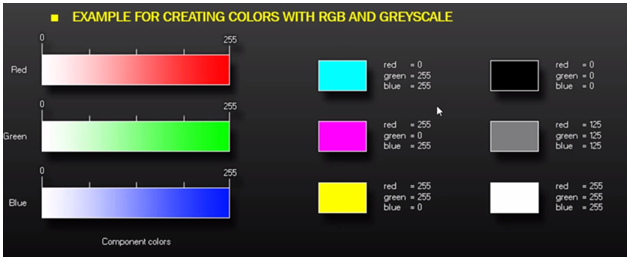

# Bajar los datos

In [ ]:
# Crear el directorio si no existe
os.makedirs(DIR, exist_ok=True)

# Descargar el archivo ZIP en la ruta especificada
!wget -O "{DIR}/kaggle_flower_images.zip" "https://www.dropbox.com/scl/fi/mxv5o39ekf6bgshz0g5jf/kaggle_flower_images.zip?rlkey=90gi41kzonieowglmbw75yop3&st=ynk3dv7h&dl=1"

# Descomprimir el archivo ZIP en el mismo directorio
!unzip -q "{DIR}/kaggle_flower_images.zip" -d "{DIR}"



--2025-06-18 21:57:22--  https://www.dropbox.com/scl/fi/mxv5o39ekf6bgshz0g5jf/kaggle_flower_images.zip?rlkey=90gi41kzonieowglmbw75yop3&st=ynk3dv7h&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6d4a0a0b7104b806e674033e92.dl.dropboxusercontent.com/cd/0/inline/Cr1p43msFkoA2T2WiywCuFqzoYpXnTUvMAD7pQxun8-bqwE3iWhVypliO0ZpUlnw8EzNruOZWnzqytwYYFQOuJqxaPPzTi_weTclIsWNzahcxU_dhVaCto8VtFgXgWlqkFUub3Sn0QWuOJ98qW5JFRdw/file?dl=1# [following]
--2025-06-18 21:57:22--  https://uc6d4a0a0b7104b806e674033e92.dl.dropboxusercontent.com/cd/0/inline/Cr1p43msFkoA2T2WiywCuFqzoYpXnTUvMAD7pQxun8-bqwE3iWhVypliO0ZpUlnw8EzNruOZWnzqytwYYFQOuJqxaPPzTi_weTclIsWNzahcxU_dhVaCto8VtFgXgWlqkFUub3Sn0QWuOJ98qW5JFRdw/file?dl=1
Resolving uc6d4a0a0b7104b806e674033e92.dl.dropboxusercontent.com (uc6d4a0a0b7104b806e674033e92.dl.dropboxu

# Manipulacion de imágenes

In [ ]:
# Ruta completa al subdirectorio donde están las imágenes
image_path = os.path.join(DIR, "kaggle_flower_images")

# Listar todos los archivos .png ordenados
path = sorted([
    os.path.join(image_path, file)
    for file in os.listdir(image_path)
    if file.endswith('.png')
])

# Mostrar resultados
print(f"Número de imágenes: {len(path)}")
print(f"Primera imagen: {path[0]}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Maestría en Ciencia de Datos - UBA/FCEN DMCyT/PreTP2/Datos/kaggle_flower_images'

In [ ]:
image_path = os.path.join(DIR, "kaggle_flower_images")
pathLabel = sorted([
    os.path.join(image_path, file)
    for file in os.listdir(image_path)
    if file.endswith('.csv')
])

print(len(pathLabel))
print(pathLabel[0])


1
/content/drive/MyDrive/Maestría en Ciencia de Datos - UBA/FCEN DMCyT/PreTP2/Datos/kaggle_flower_images/flower_labels.csv


In [ ]:
print(img.shape)

(128, 128)


Carguemos la imagen en escala de grises

In [ ]:
img = cv2.imread(path[0],cv2.IMREAD_GRAYSCALE)
imgTira = img.flatten()
print('El tamaño del dato es ', img.shape)
print('El tamaño del dato en formato tira es ', imgTira.shape)

El tamaño del dato es  (128, 128)
El tamaño del dato en formato tira es  (16384,)


In [ ]:
from PIL import Image

img = Image.open(path[0])
print(img.mode)


RGBA


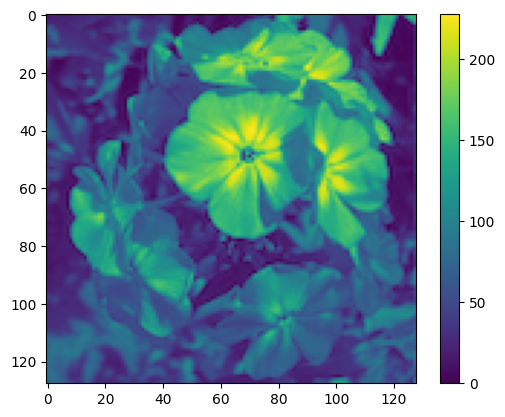

In [ ]:
# VISUALICEMOS LA IMAGEN SIN ESPECIFICAR COLORMAP
plt.imshow(img)
plt.colorbar()


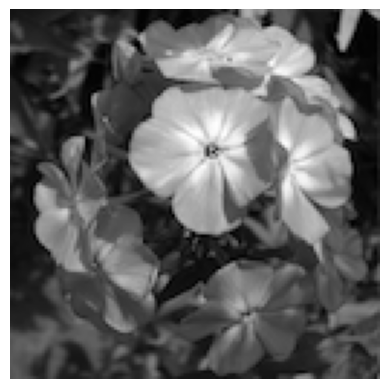

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Si la imagen original es RGB, la convertimos a escala de grises
if len(img.shape) == 3:
    gris = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
else:
    gris = img

# Mostrar la imagen en escala de grises
plt.imshow(gris, cmap='gray')
plt.axis('off')
plt.show()








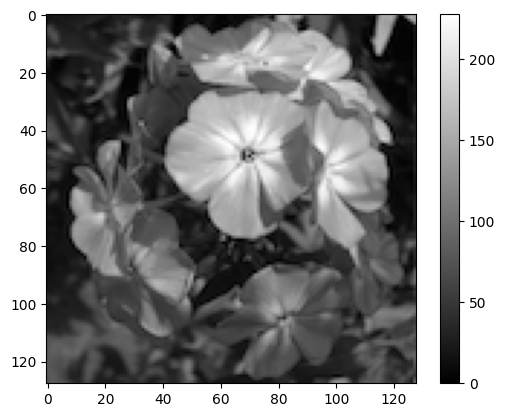

In [ ]:
# ESPECIFIQUEMOS EL COLORMAP DE GRISES
plt.imshow(img,cmap='gray')
plt.colorbar()


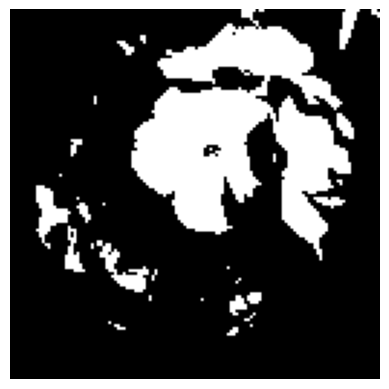

In [ ]:
# 2. Aplicar umbral binario
_, binaria = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# 3. Mostrar el resultado
plt.imshow(binaria, cmap='gray')
plt.axis('off')
plt.show()

#La binarización de imágenes se realiza mediante técnicas de umbralización, que transforman una imagen en escala de grises en una imagen binaria. El valor umbral (comúnmente 128) determina qué píxeles se asignan a blanco (valor alto) o negro (valor bajo). Esta técnica permite resaltar estructuras relevantes y reducir la complejidad de procesamiento. En lugar de elegir el umbral manualmente, se puede aplicar el método de Otsu, que optimiza la separación entre clases mediante la minimización de la varianza intra-clase.


Ahora cargémosla en colores

In [ ]:
img = cv2.imread(path[0],cv2.IMREAD_COLOR)
imgTira = img.flatten()
print('El tamaño del dato es ', img.shape)
print('El tamaño del dato en formato tira es ', imgTira.shape)

El tamaño del dato es  (128, 128, 3)
El tamaño del dato en formato tira es  (49152,)


ATENCION:

La librería CV2 asume un orden de canales BGR (azul, verde, rojo) en vez del tradicional RGB.

Así que las imágenes cargadas con la función *imread* de CV2 deben ser visualizadas con la función *imshow* de la librería CV2, ya que si usan la función *imshow* de matplotlib (que asume RGB) va a tomar los canales en el orden incorrecto (¡lo azul se verá como rojo y viceversa!)
Para complicar más las cosas, la función *cv2.imshow* no es compatible con Jupyter Notebooks (y por ende colabs)... Por lo que nos bajamos una función *cv2_imshow* que la substituye:

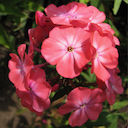

In [ ]:
cv2_imshow(img)

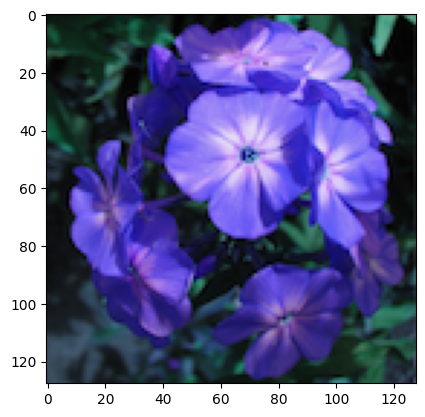

In [ ]:
### Cuidado con el orden de los canales
plt.imshow(img)

Si quiero usar la librería matplotlib tengo que intercambiar los canales rojo y azul:

(-0.5, 127.5, 127.5, -0.5)

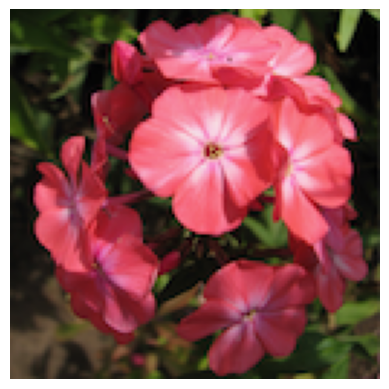

In [ ]:
rojo=img[:,:,2].copy()
azul=img[:,:,0].copy()

imgRGB=img.copy()
imgRGB[:,:,0]=rojo
imgRGB[:,:,2]=azul

plt.imshow(imgRGB)
plt.axis('off')

Veamos la contribución del canal rojo:

(-0.5, 127.5, 127.5, -0.5)

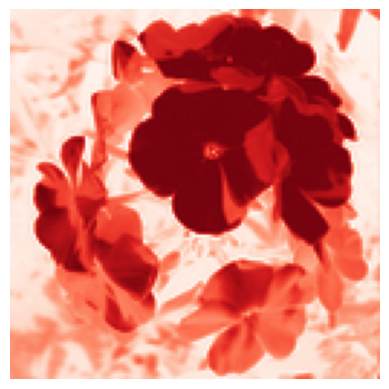

In [ ]:
imagenCanal = imgRGB[:,:,0]
plt.imshow(imagenCanal,cmap='Reds')
plt.axis('off')

La imagen se trata como un array. Puedo elegir qué parte mostrar

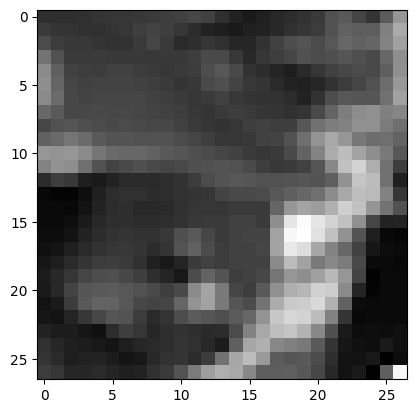

In [ ]:
# Puedo seleccionar una región de la imagen
img=cv2.imread(path[0],cv2.IMREAD_GRAYSCALE)
plt.imshow(img[3:30,3:30],cmap='gray')


Text(0.5, 0, 'pixel values')

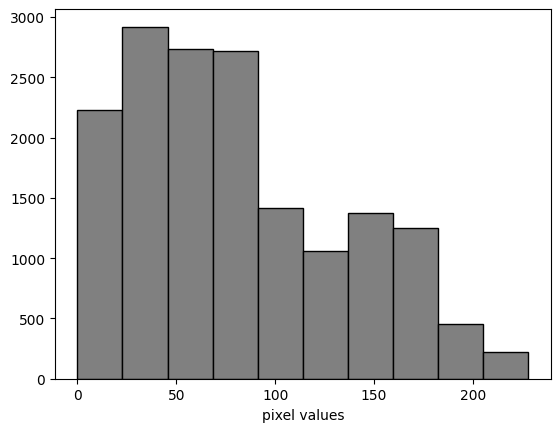

In [ ]:
# Una forma de caracterizar la imagen es ver cómo es la distribución de los pixels
plt.hist(img.flatten(),bins=10,color='gray',edgecolor='k')
plt.xlabel('pixel values')

Como cualquier matriz, la imagen se puede rotar o girar

(-0.5, 127.5, 127.5, -0.5)

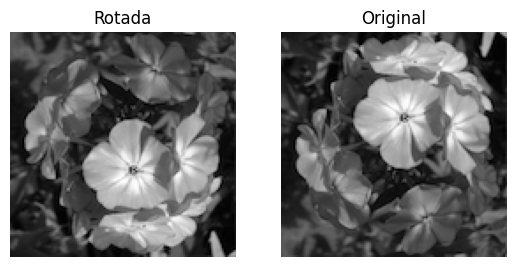

In [ ]:
imagen_rotada = np.flipud(img) #Reverse the order of elements along axis 0 (up/down).
plt.subplot(1,2,1)
plt.imshow(imagen_rotada,cmap='gray')
plt.title("Rotada")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img,cmap='gray')
plt.title("Original")
plt.axis('off')

#Para suavizar una imagen o para reducir el ruido se usan filtros sobre las imágenes.

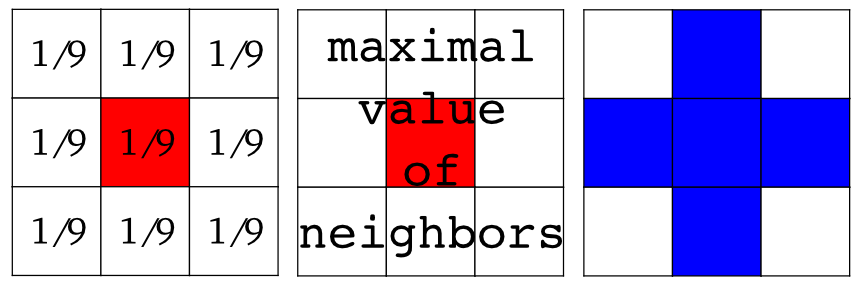


Text(0.5, 1.0, 'Filtrada')

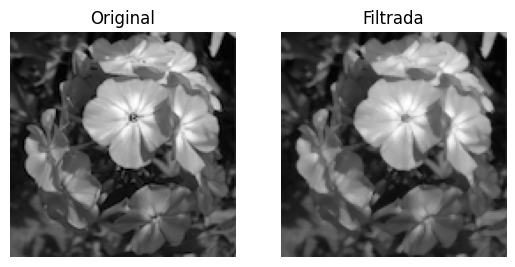

In [ ]:
from scipy.ndimage import median_filter
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html
imagen_filtrada = median_filter(img,size=2)

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(imagen_filtrada, cmap='gray')
plt.axis('off')
plt.title('Filtrada')

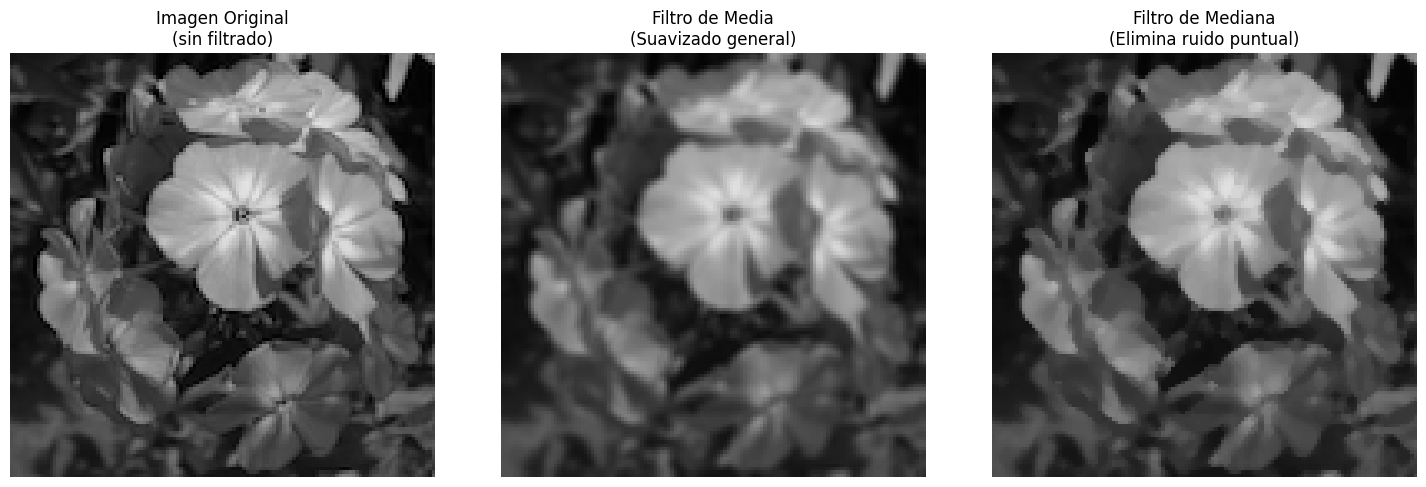

In [ ]:
# Leer imagen en escala de grises
imagen = cv2.imread(path[0], cv2.IMREAD_GRAYSCALE)

# Aplicar filtro de media (media en ventana 3x3)
imagen_media = cv2.blur(imagen, (3, 3))

# Aplicar filtro de mediana (ventana 3x3)
imagen_mediana = cv2.medianBlur(imagen, 3)

# Crear figura con fondo blanco
fig, axs = plt.subplots(1, 3, figsize=(15, 5), facecolor='white')

# Lista de imágenes y títulos
imagenes = [imagen, imagen_media, imagen_mediana]
titulos = [
    "Imagen Original\n(sin filtrado)",
    "Filtro de Media\n(Suavizado general)",
    "Filtro de Mediana\n(Elimina ruido puntual)"
]

# Mostrar cada imagen
for ax, img, title in zip(axs, imagenes, titulos):
    ax.imshow(img, cmap='gray', vmin=0, vmax=255)
    ax.set_title(title, fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()



# Pongamos las imagenes en un data frame para poder analizarlo con técnicas de reducción de dimensionalidad

In [ ]:
#labels
labels = pd.read_csv(pathLabel[0])
labels.columns = ['imagen_de_flor', 'especie']

df = pd.DataFrame()
for a in path:
    img = cv2.imread(a, cv2.IMREAD_COLOR)
    if img.shape == (128, 128, 3):
        fila = pd.DataFrame(img.flatten()).T
        fila.insert(0, 'imagen_de_flor', os.path.basename(a))  # primera columna
        df = pd.concat([df, fila], ignore_index=True)

df_flores = df.merge(labels, on='imagen_de_flor')

df_flores = df.merge(labels, on='imagen_de_flor')
df_flores = df_flores[['imagen_de_flor', 'especie'] + df.columns.drop('imagen_de_flor').tolist()]



NameError: name 'pd' is not defined

# Promedios

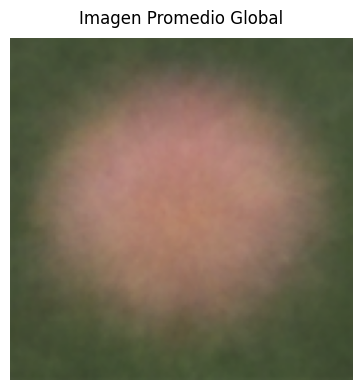

In [ ]:
# Promedio de todas las imágenes
imagenes = df_flores.iloc[:, 2:].values
promedio_global = np.mean(imagenes, axis=0).reshape(128, 128, 3).astype('uint8')

# Convertir de BGR a RGB si fue cargado con OpenCV
promedio_rgb = cv2.cvtColor(promedio_global, cv2.COLOR_BGR2RGB)

# Crear figura con título mejor ubicado
plt.figure(figsize=(4, 4))
plt.imshow(promedio_rgb)
plt.title("Imagen Promedio Global", fontsize=12, pad=10)
plt.axis("off")
plt.tight_layout()
plt.show()


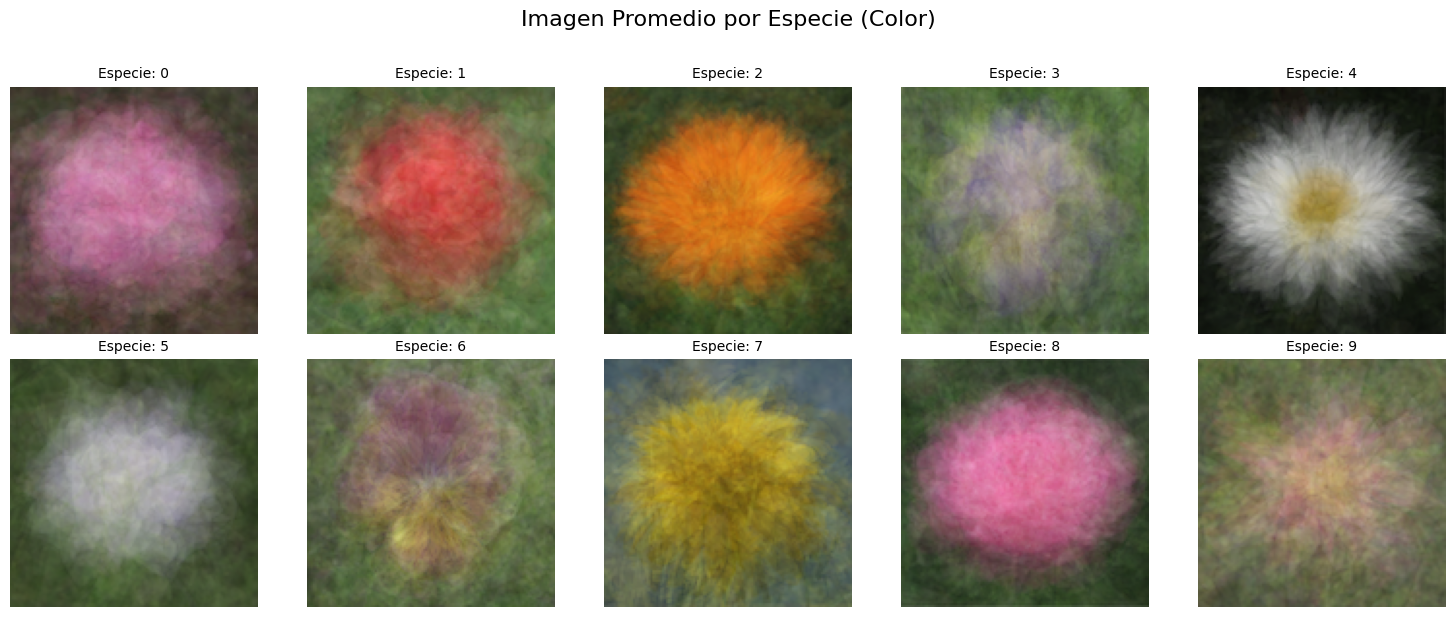

In [ ]:
# Crear figura: 2 filas × 5 columnas
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

# Iterar sobre las especies ordenadas alfabéticamente
for i, especie in enumerate(sorted(df_flores['especie'].unique())):
    # Seleccionamos solo las filas correspondientes a esta especie
    subset = df_flores[df_flores['especie'] == especie].iloc[:, 2:]

    # Calculamos el promedio por especie
    promedio = np.mean(subset.values, axis=0).reshape(128, 128, 3).astype('uint8')

    # Mostramos la imagen
    axs[i].imshow(cv2.cvtColor(promedio, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f"Especie: {especie}", fontsize=10)
    axs[i].axis("off")

# Título general
plt.suptitle("Imagen Promedio por Especie (Color)", fontsize=16, y=1.02)

# Ajuste de espacio
plt.tight_layout()
plt.show()



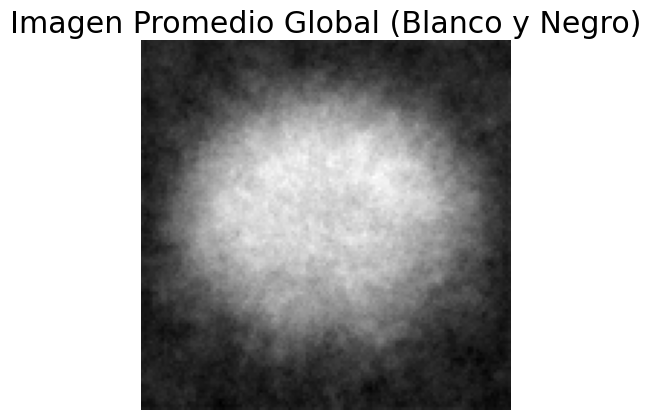

In [ ]:
def a_blanco_y_negro(serie):
    vector_img = serie.to_numpy()  # convertir la fila en un array de NumPy
    img = vector_img.reshape(128, 128, 3).astype('uint8')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    return binary.flatten()

# Aplicar a todas las imágenes
imagenes_bn = np.vstack(df_flores.iloc[:, 2:].apply(a_blanco_y_negro, axis=1))
promedio_bn = np.mean(imagenes_bn, axis=0).reshape(128, 128).astype('uint8')

# Mostrar imagen promedio binaria global
plt.imshow(promedio_bn, cmap='gray')
plt.title("Imagen Promedio Global (Blanco y Negro)")
plt.axis("off")
plt.show()



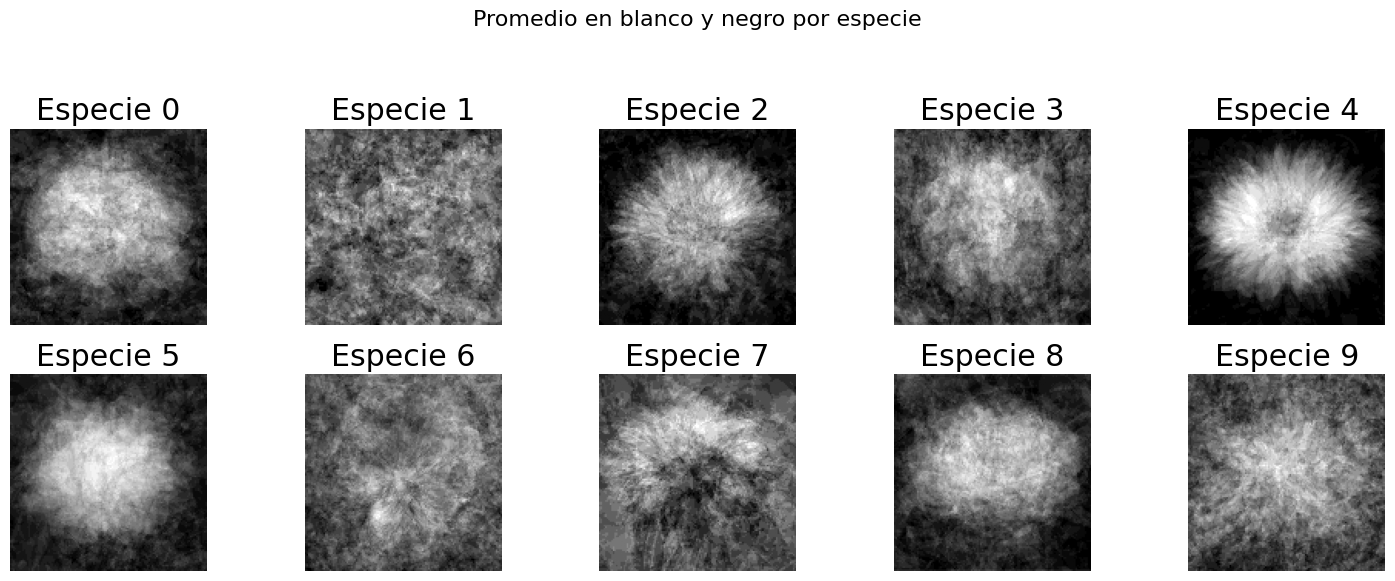

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Función para convertir a blanco y negro
def a_blanco_y_negro(img_series):
    img_vector = img_series.values  # Convertir la serie en vector NumPy
    img = img_vector.reshape(128, 128, 3).astype('uint8')
    gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binaria = cv2.threshold(gris, 128, 255, cv2.THRESH_BINARY)
    return binaria.flatten()

# Promedios por especie
imagenes_promedio_bn = []

for especie in range(10):
    especie_df = df_flores[df_flores['especie'] == especie]
    imagenes_bn = np.vstack(especie_df.iloc[:, 2:].apply(a_blanco_y_negro, axis=1))
    promedio_bn = np.mean(imagenes_bn, axis=0).reshape(128, 128).astype('uint8')
    imagenes_promedio_bn.append(promedio_bn)

# Graficar
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

for i in range(10):
    axs[i].imshow(imagenes_promedio_bn[i], cmap='gray')
    axs[i].set_title(f'Especie {i}')
    axs[i].axis('off')

plt.suptitle("Promedio en blanco y negro por especie", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Histogramas promedio por especie

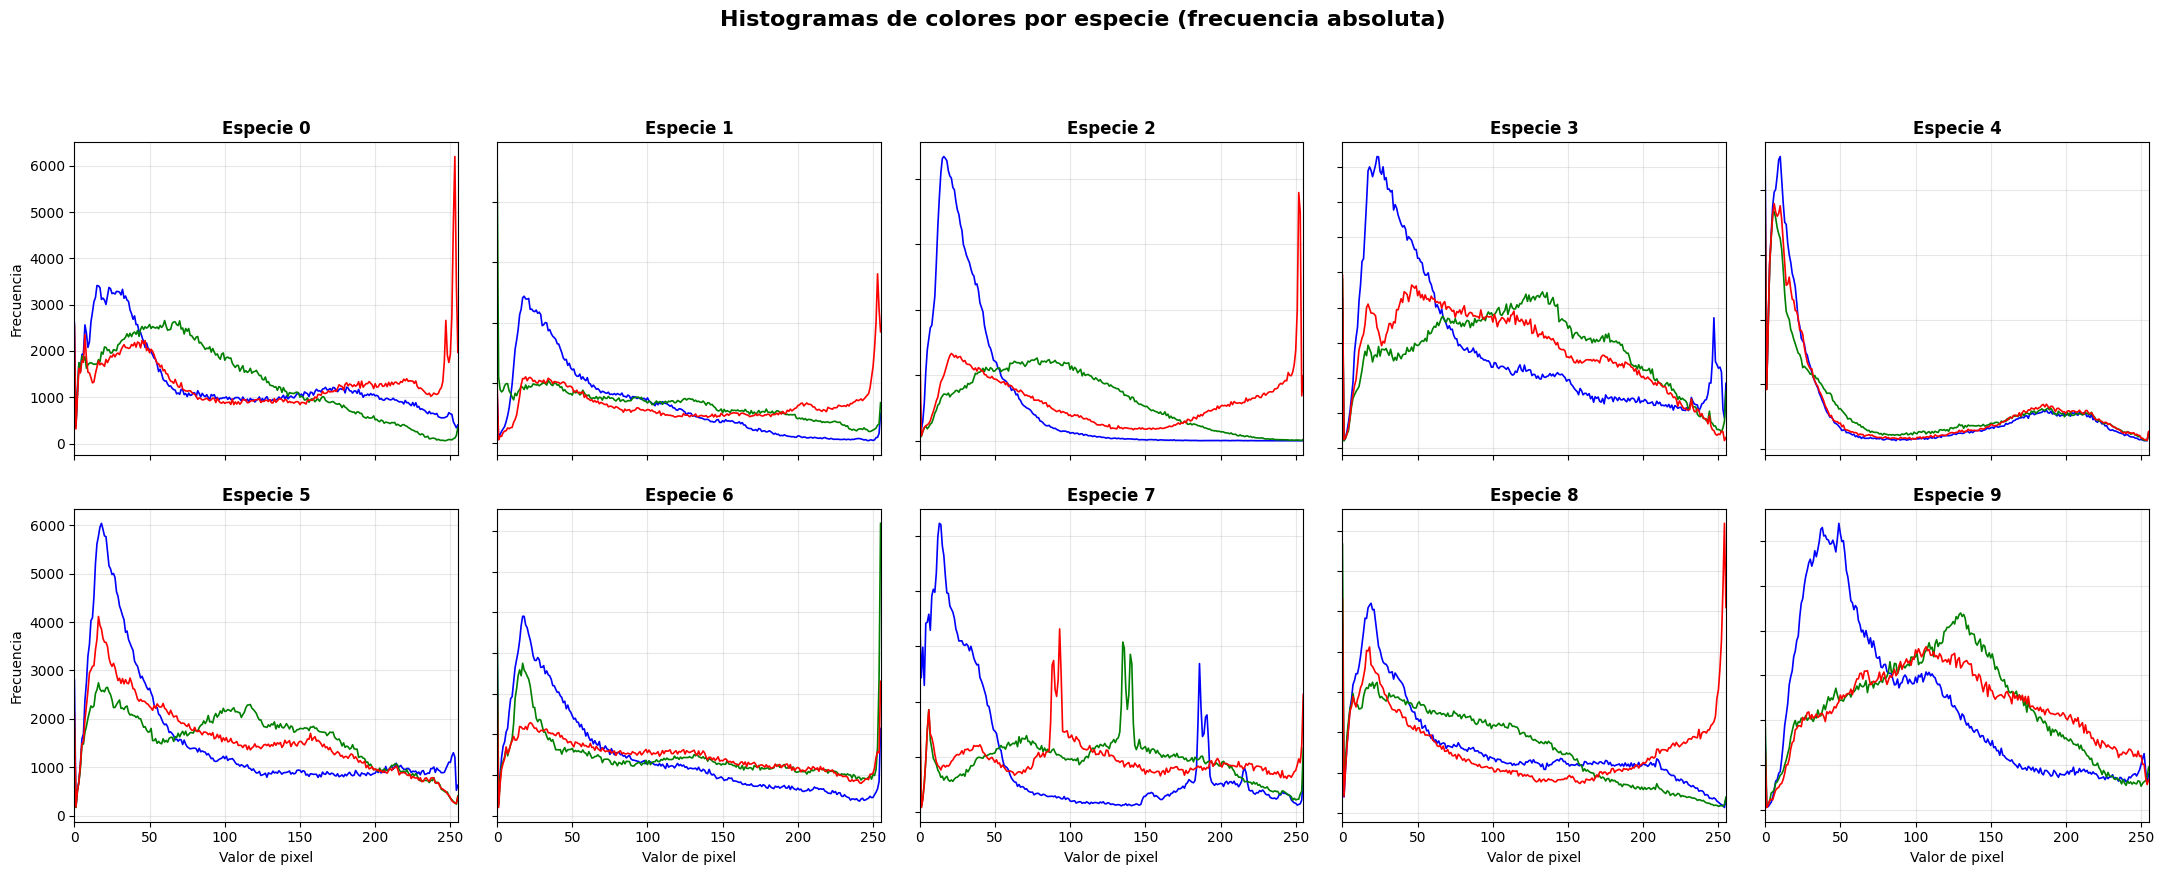

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

colores = ['blue', 'green', 'red']
n_especies = df_flores['especie'].nunique()

# Crear figura y subplots
fig, axs = plt.subplots(2, 5, figsize=(22, 9))
axs = axs.flatten()

for especie in range(n_especies):
    especie_df = df_flores[df_flores['especie'] == especie]

    hist_r = np.zeros((256,))
    hist_g = np.zeros((256,))
    hist_b = np.zeros((256,))

    for i in range(len(especie_df)):
        img_vector = especie_df.iloc[i, 2:].values
        img = img_vector.reshape(128, 128, 3).astype('uint8')
        b, g, r = cv2.split(img)
        hist_b += cv2.calcHist([b], [0], None, [256], [0, 256]).flatten()
        hist_g += cv2.calcHist([g], [0], None, [256], [0, 256]).flatten()
        hist_r += cv2.calcHist([r], [0], None, [256], [0, 256]).flatten()

    axs[especie].plot(hist_b, color='blue', linewidth=1.2)
    axs[especie].plot(hist_g, color='green', linewidth=1.2)
    axs[especie].plot(hist_r, color='red', linewidth=1.2)
    axs[especie].set_title(f'Especie {especie}', fontsize=12, fontweight='bold')
    axs[especie].set_xlim([0, 255])
    axs[especie].tick_params(axis='both', labelsize=10)
    axs[especie].grid(alpha=0.3)

# Estética general
for ax in axs:
    ax.set_xlabel("Valor de pixel", fontsize=10)
    ax.set_ylabel("Frecuencia", fontsize=10)
    ax.label_outer()

plt.suptitle("Histogramas de colores por especie (frecuencia absoluta)", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()



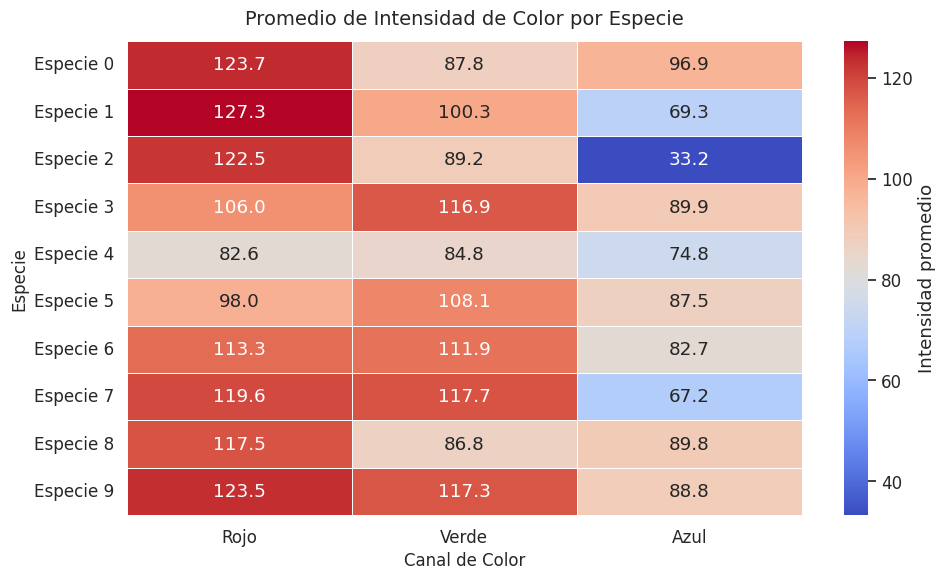

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Crear DataFrame de promedio por especie y canal (asumiendo df_flores ya procesado)
promedios_rgb = []

for especie in range(10):
    especie_df = df_flores[df_flores['especie'] == especie]

    r_total, g_total, b_total = 0, 0, 0
    for i in range(len(especie_df)):
        img_vector = especie_df.iloc[i, 2:].values
        img = img_vector.reshape(128, 128, 3).astype('uint8')
        canales = cv2.split(img)
        b_total += np.mean(canales[0])
        g_total += np.mean(canales[1])
        r_total += np.mean(canales[2])

    cantidad = len(especie_df)
    promedios_rgb.append([
        r_total / cantidad,
        g_total / cantidad,
        b_total / cantidad
    ])

df_rgb = pd.DataFrame(promedios_rgb, columns=['Rojo', 'Verde', 'Azul'])
df_rgb.index = [f'Especie {i}' for i in range(10)]

# Gráfico con estilo profesional
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid", font_scale=1.1)
ax = sns.heatmap(
    df_rgb,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"label": "Intensidad promedio"}
)

ax.set_title("Promedio de Intensidad de Color por Especie", fontsize=14, pad=12)
ax.set_xlabel("Canal de Color", fontsize=12)
ax.set_ylabel("Especie", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



# PCA

Cantidad de componentes necesarias para explicar el 95% de la varianza: 153


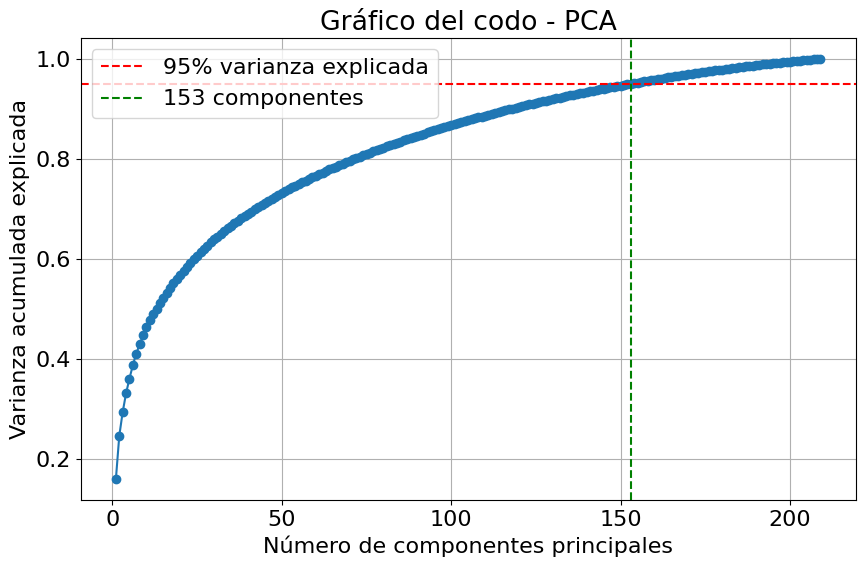

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Tomar solo las columnas numéricas (sin 'imagen_de_la_flor' ni 'especie')
X = df_flores.drop(columns=['imagen_de_flor', 'especie'])

# PCA sin reducción para conocer la varianza explicada acumulada
pca = PCA()
X_pca = pca.fit_transform(X)

# Varianza acumulada
var_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Número de componentes que explican al menos el 95%
n_componentes_95 = np.argmax(var_acumulada >= 0.95) + 1
print(f"Cantidad de componentes necesarias para explicar el 95% de la varianza: {n_componentes_95}")

# Gráfico del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(var_acumulada) + 1), var_acumulada, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza explicada')
plt.axvline(x=n_componentes_95, color='g', linestyle='--', label=f'{n_componentes_95} componentes')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada explicada')
plt.title('Gráfico del codo - PCA')
plt.legend()
plt.grid(True)
plt.show()



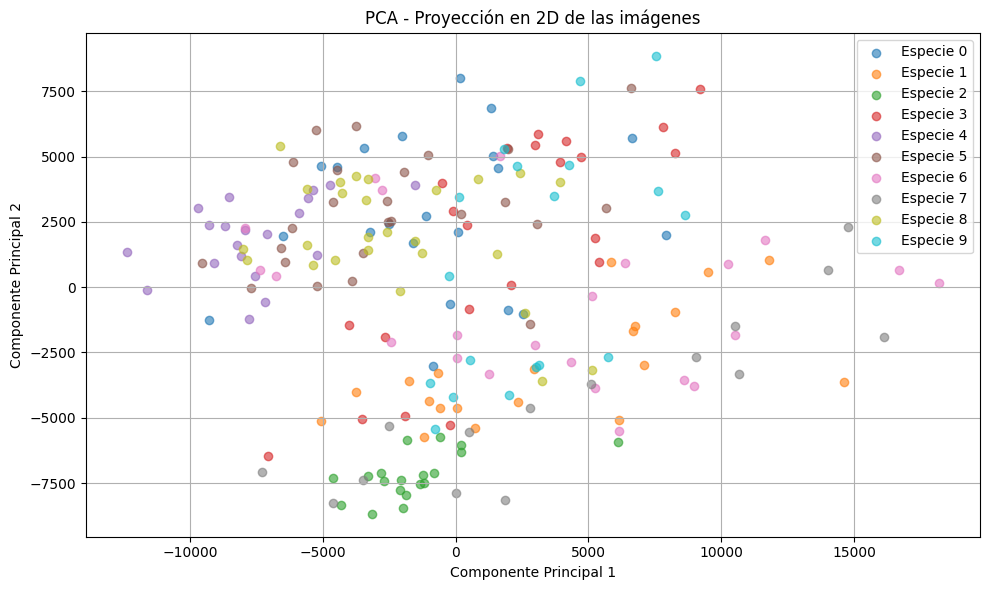

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for especie in np.unique(y):
    idx = y == especie
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f'Especie {especie}', alpha=0.6)

plt.title("PCA - Proyección en 2D de las imágenes")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


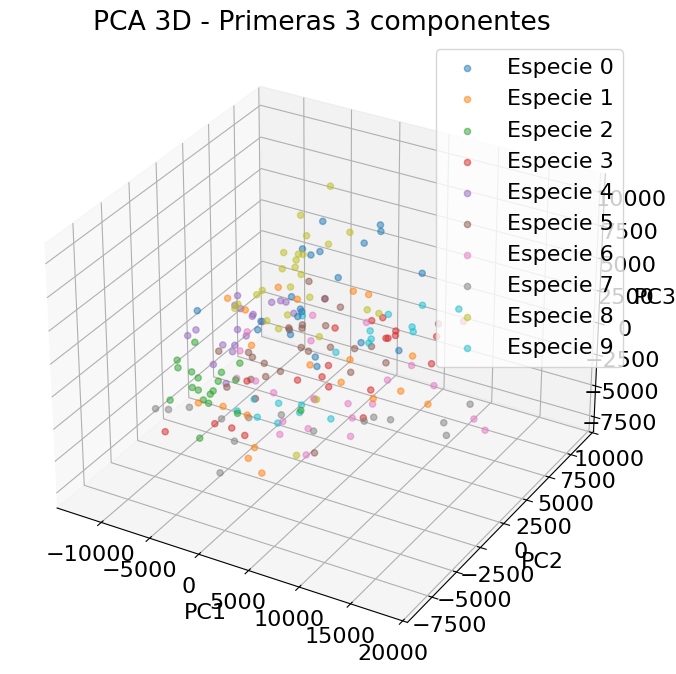

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for especie in np.unique(y):
    idx = y == especie
    ax.scatter(X_pca[idx, 0], X_pca[idx, 1], X_pca[idx, 2], label=f'Especie {especie}', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D - Primeras 3 componentes')
ax.legend()
plt.tight_layout()
plt.show()


# Clustimage

In [ ]:
ruta_imagenes = os.path.join(DIR, "kaggle_flower_images")
cl = Clustimage(method='pca')
cl.fit_transform(ruta_imagenes)
cl.cluster(cluster_space='xycoord')


[19-06-2025 16:15:51] [clustimage.clustimage] Cleaning previous fitted model results
[19-06-2025 16:15:51] [clustimage.clustimage] [210] Images are collected from path </content/drive/MyDrive/Maestría en Ciencia de Datos - UBA/FCEN DMCyT/PreTP2/Datos/kaggle_flower_images>
[19-06-2025 16:15:51] [clustimage.clustimage] [210] Read and check..
[19-06-2025 16:15:51] [clustimage.clustimage] Preprocessing images..
[clustimage]: 100%|██████████| 210/210 [00:02<00:00, 104.03it/s]
[19-06-2025 16:15:53] [clustimage.clustimage] Fitting model and extracting features using [pca] method.
[19-06-2025 16:16:06] [clustimage.clustimage] Extracted features using [pca]: samples=210, features=154
[19-06-2025 16:16:06] [clustimage.clustimage] Compute [%s] embedding
[19-06-2025 16:16:07] [clustimage.clustimage] Cluster evaluation using the [%s] feature space of the [%s] features.
[clusteval] >INFO: 100%|██████████| 22/22 [00:00<00:00, 227.90it/s]
[19-06-2025 16:16:07] [clustimage.clustimage] Updating cluster-

array([2, 3, 3, 2, 3, 2, 3, 2, 2, 1, 2, 3, 0, 2, 2, 1, 2, 1, 3, 3, 1, 2,
       1, 3, 3, 0, 3, 1, 1, 3, 1, 0, 3, 3, 1, 2, 0, 2, 1, 0, 3, 3, 1, 2,
       0, 0, 2, 1, 3, 2, 2, 3, 1, 1, 2, 3, 3, 1, 1, 3, 3, 2, 2, 3, 1, 2,
       2, 3, 0, 2, 2, 2, 1, 1, 3, 0, 2, 2, 1, 1, 3, 1, 2, 3, 0, 0, 3, 3,
       0, 3, 0, 2, 3, 2, 0, 1, 1, 2, 0, 1, 1, 2, 3, 2, 2, 2, 2, 2, 1, 2,
       3, 2, 2, 1, 0, 0, 1, 1, 2, 1, 2, 3, 2, 0, 1, 3, 0, 3, 2, 0, 2, 2,
       3, 1, 2, 2, 2, 0, 0, 2, 1, 2, 3, 3, 3, 2, 0, 0, 3, 3, 0, 3, 3, 3,
       3, 1, 3, 1, 3, 2, 2, 1, 2, 2, 1, 2, 1, 3, 1, 1, 0, 1, 2, 1, 1, 3,
       3, 1, 1, 1, 1, 0, 2, 2, 2, 3, 3, 2, 1, 2, 3, 2, 2, 1, 2, 2, 1, 3,
       0, 1, 1, 2, 1, 3, 2, 1, 2, 2, 2, 2], dtype=int32)

In [ ]:
print(np.unique(cl.results['labels']))



[0 1 2 3]


[19-06-2025 16:23:23] [clustimage.clustimage] Compute unique images..
[19-06-2025 16:23:24] [clustimage.clustimage] Updating cluster-labels


<Figure size 1000x500 with 0 Axes>

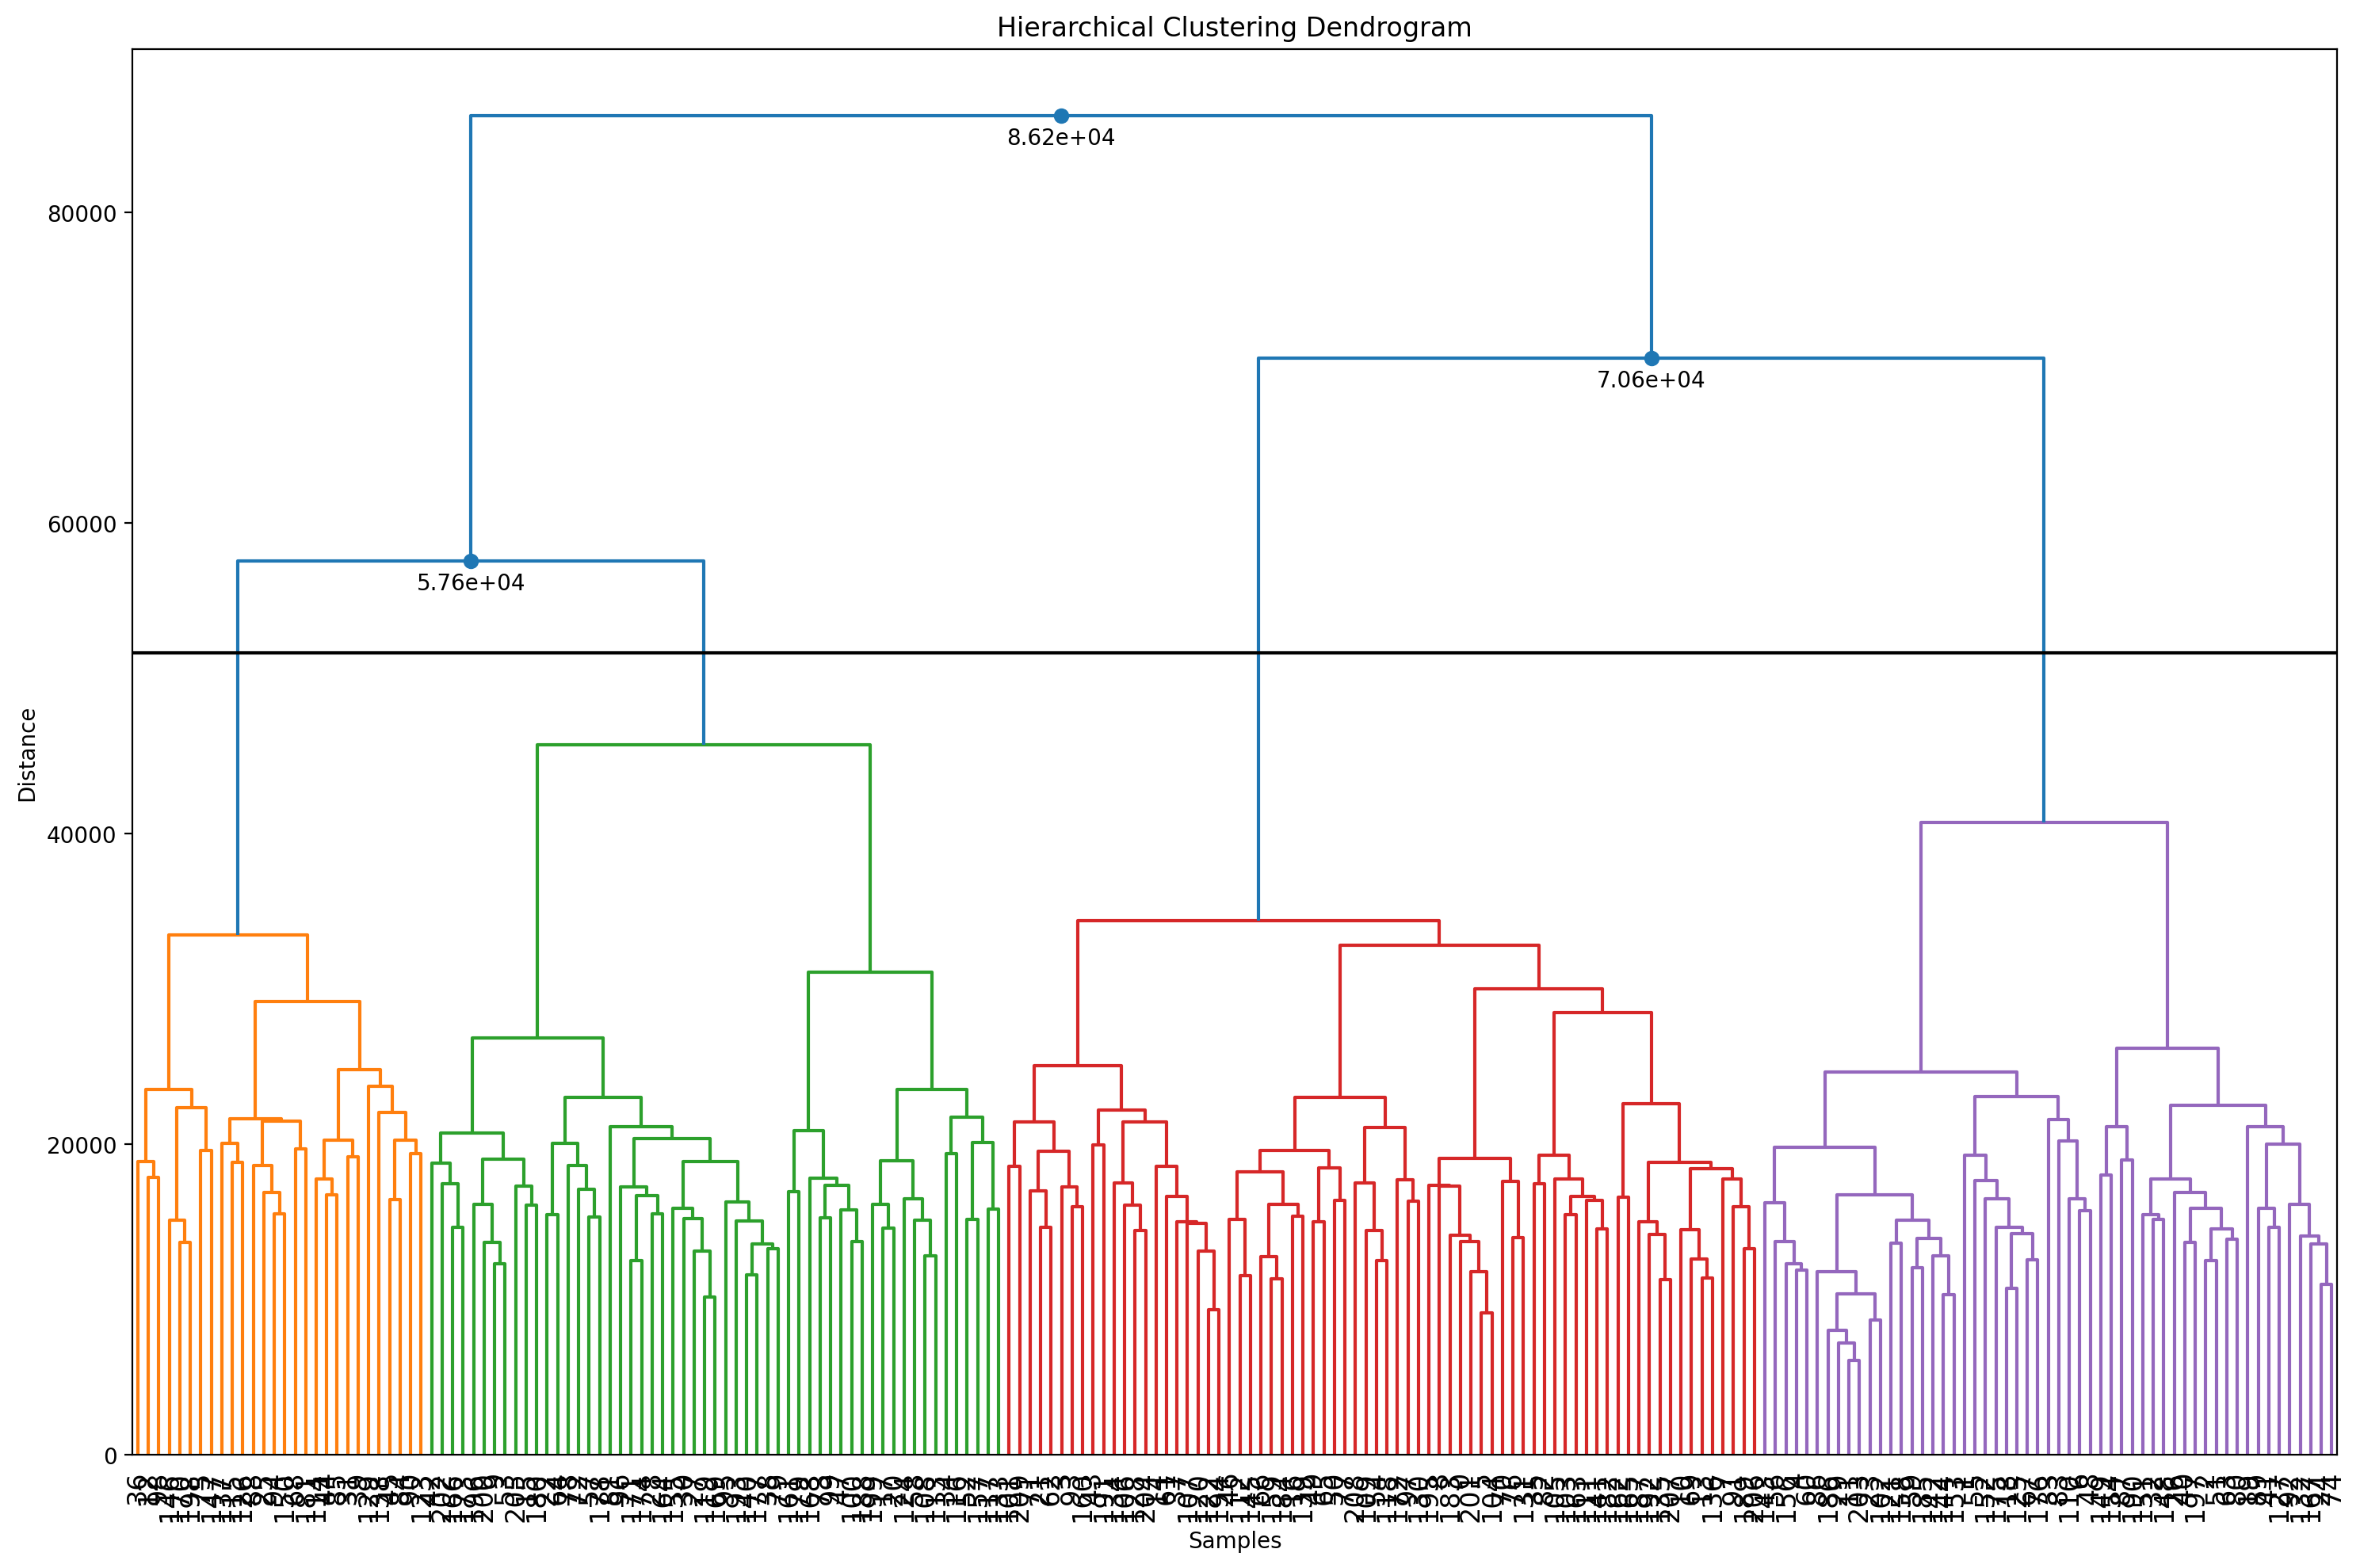

In [ ]:
plt.figure(figsize=(10, 5))  # ancho x alto
cl.dendrogram()
plt.tight_layout()
plt.show()


[19-06-2025 16:23:30] [scatterd.scatterd] [INFO] Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


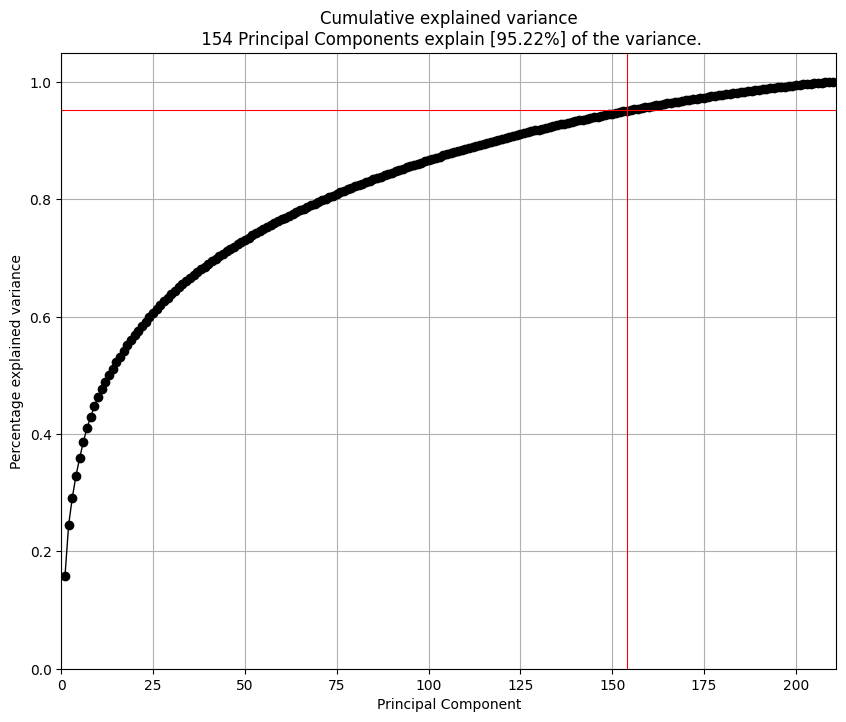

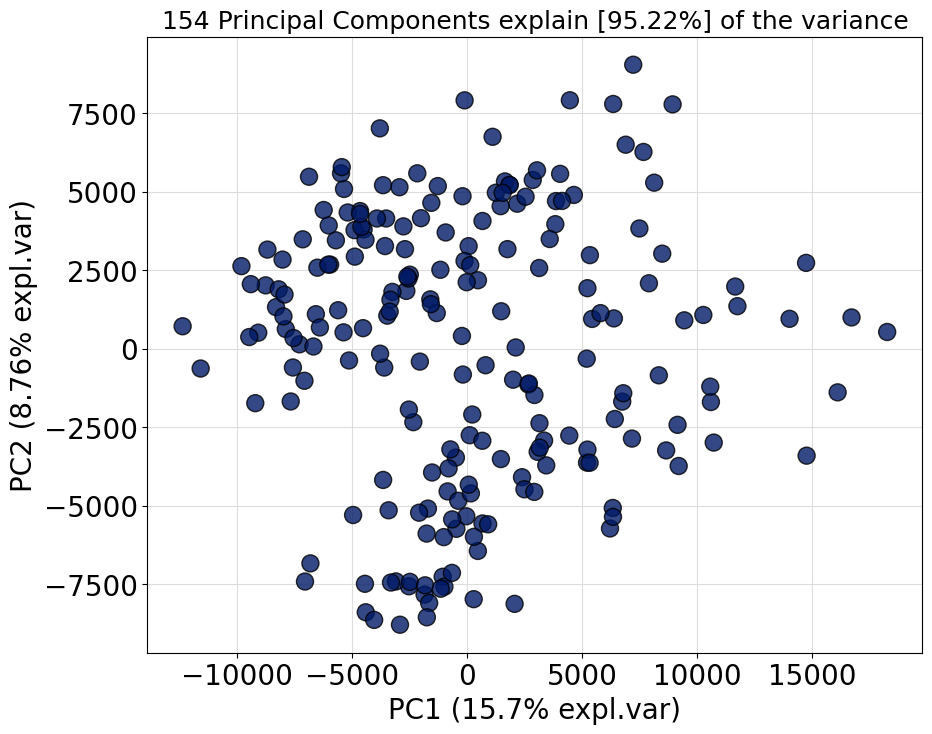

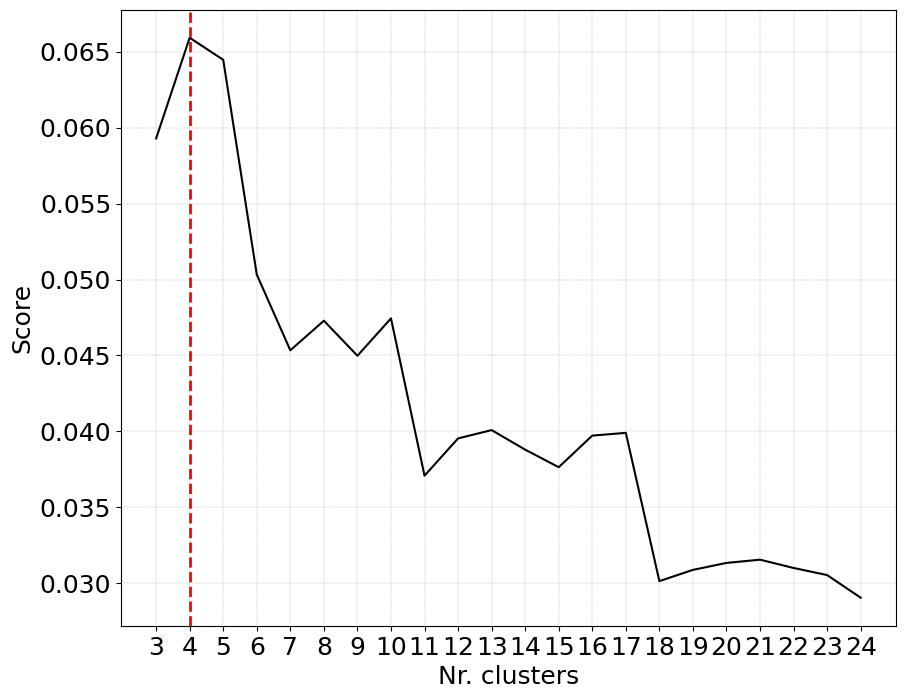

[19-06-2025 16:23:30] [scatterd.scatterd] [INFO] Create scatterplot


(<Figure size 1000x800 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

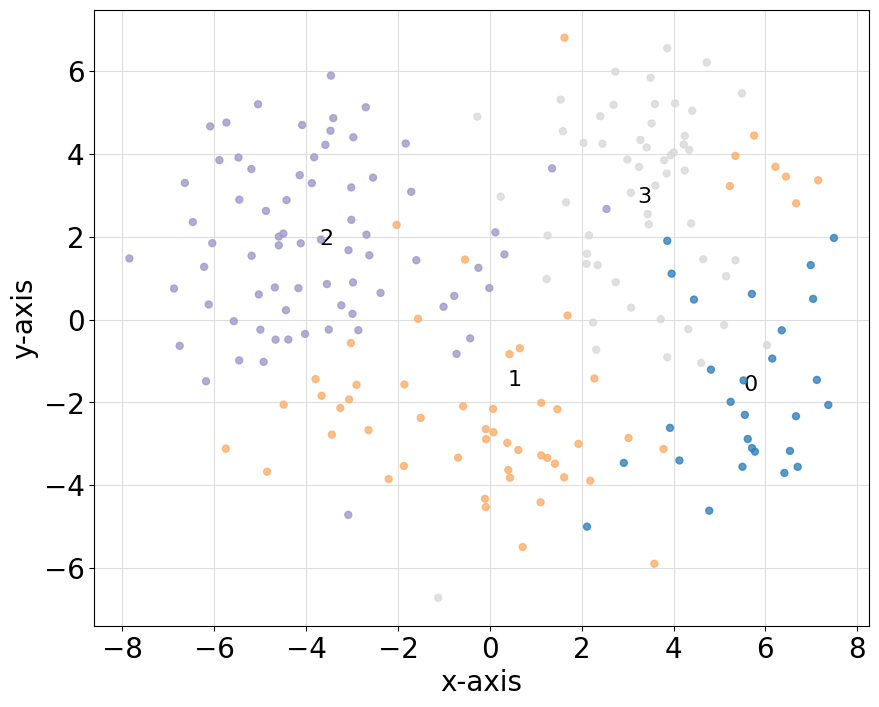

In [ ]:
# Plot the explained variance
cl.pca.plot(figsize=(10,8))
# Make scatter plot of PC1 vs PC2
cl.pca.scatter(legend=False, label=False, figsize=(10,8))
# Plot the evaluation of the number of clusters
cl.clusteval.plot(figsize=(10,8))
# Make silhouette plot
cl.clusteval.scatter(cl.results['xycoord'], figsize=(10,8))

[19-06-2025 16:23:40] [colourmap.colourmap] [INFO] Add transparency to RGB colors (last column)
[19-06-2025 16:23:40] [scatterd.scatterd] [INFO] Create scatterplot


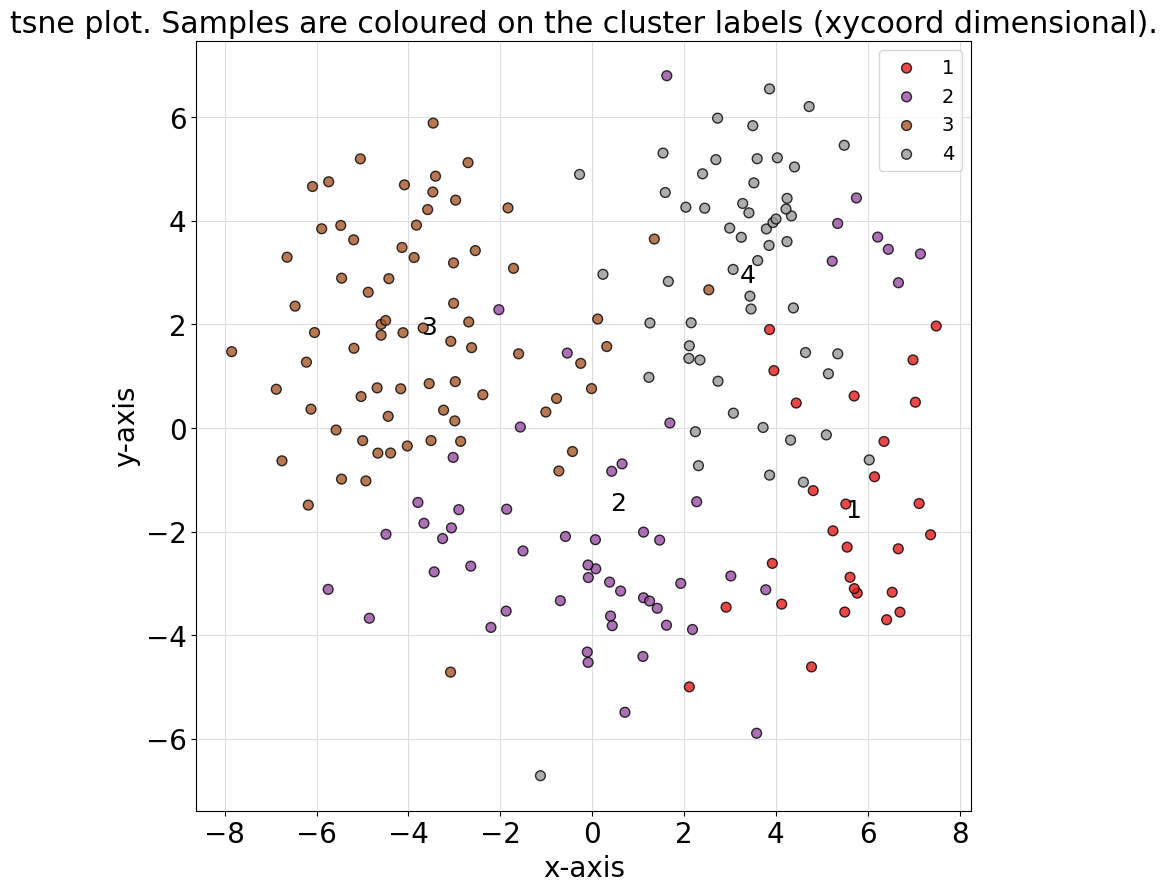

[19-06-2025 16:23:40] [colourmap.colourmap] [INFO] Add transparency to RGB colors (last column)
[19-06-2025 16:23:41] [scatterd.scatterd] [INFO] Create scatterplot


<Figure size 640x480 with 0 Axes>

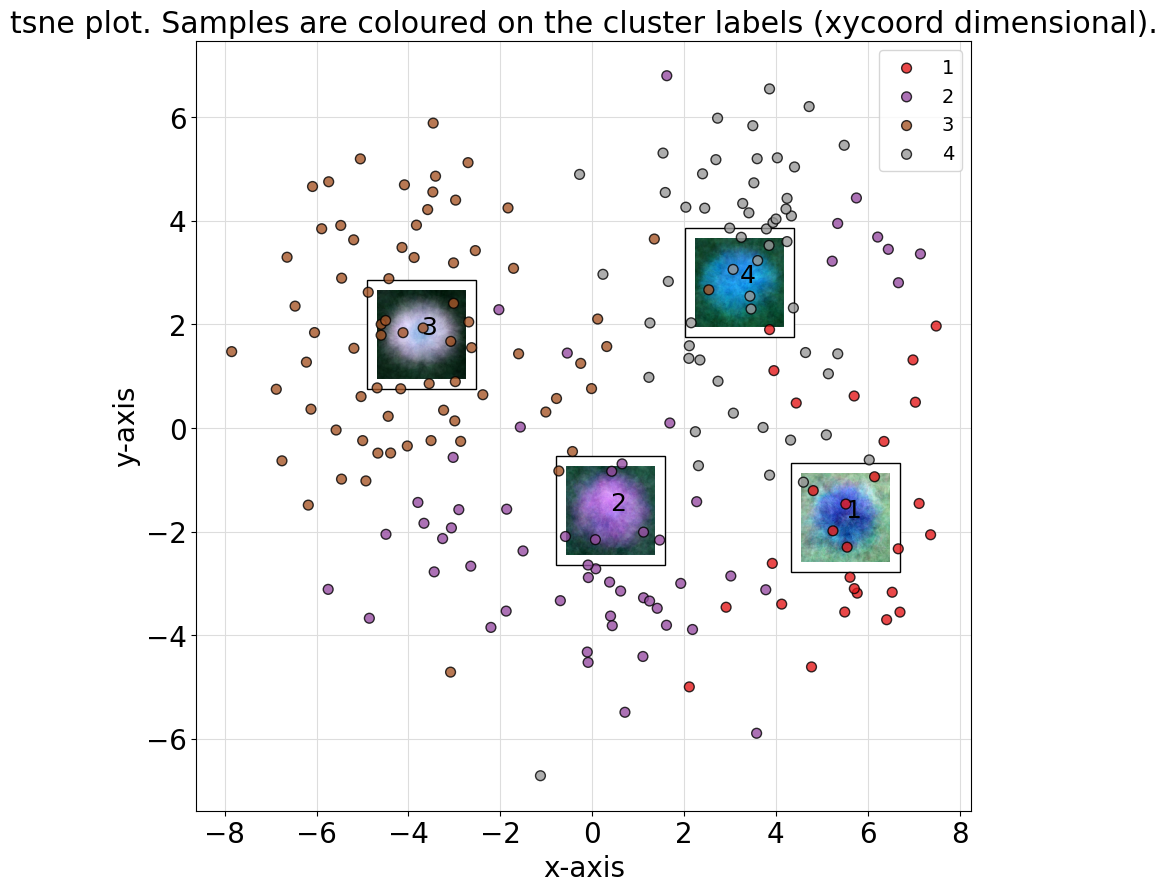

[19-06-2025 16:23:41] [colourmap.colourmap] [INFO] Add transparency to RGB colors (last column)
[19-06-2025 16:23:41] [scatterd.scatterd] [INFO] Create scatterplot


<Figure size 640x480 with 0 Axes>

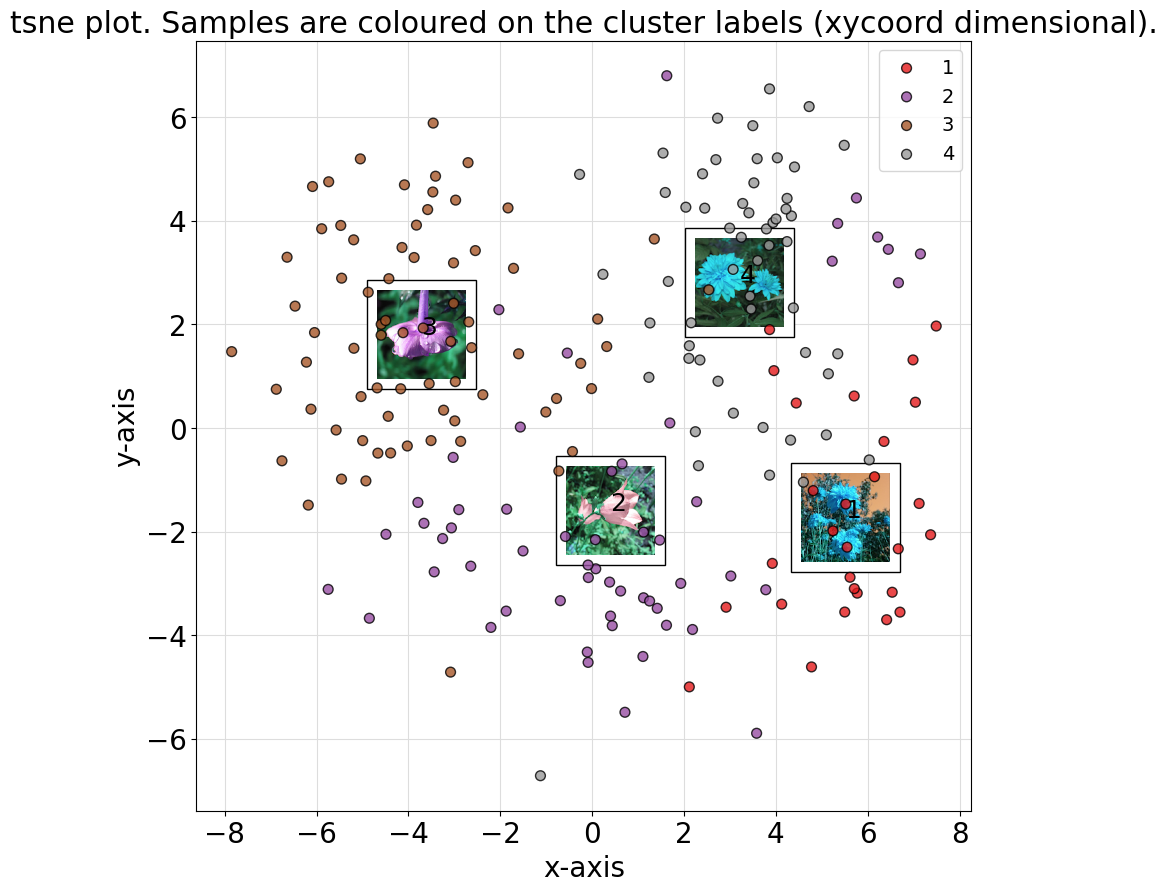

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'tsne plot. Samples are coloured on the cluster labels (xycoord dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 640x480 with 0 Axes>

In [ ]:
cl.scatter(dotsize=50, zoom=None, figsize=(10,10))
cl.scatter(dotsize=50, zoom=0.5, figsize=(10,10))
cl.scatter(dotsize=50, zoom=0.5, img_mean=False, figsize=(10,10))

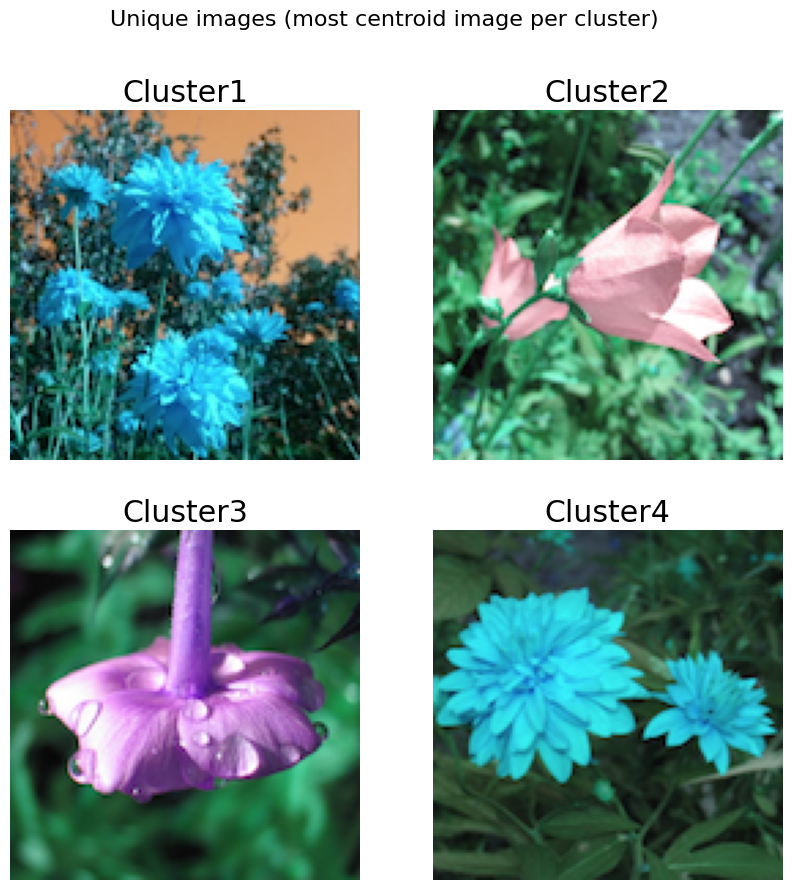

In [ ]:
cl.plot_unique(img_mean=False, figsize=(10,10))

In [ ]:
cl.scatter(zoom=1.2, plt_all=True, figsize=(150,100))

# Generar imágenes random

In [ ]:
# Usamos las imágenes .png del directorio
image_files = sorted([
    os.path.join(image_path, file)
    for file in os.listdir(image_path)
    if file.endswith('.png')
])

# Cargamos las primeras 4 imágenes como ejemplo
images = [Image.open(f).resize((128, 128)) for f in image_files[:4]]  # redimensionamos por simplicidad


In [ ]:
images

[<PIL.Image.Image image mode=RGBA size=128x128>,
 <PIL.Image.Image image mode=RGBA size=128x128>,
 <PIL.Image.Image image mode=RGBA size=128x128>,
 <PIL.Image.Image image mode=RGBA size=128x128>]

## Parte 1: Mezclar los píxeles de una imagen

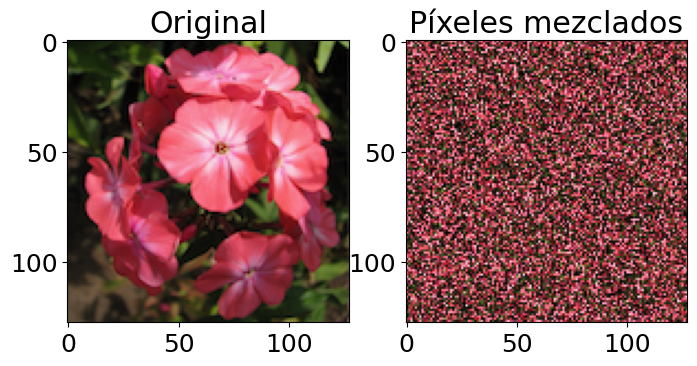

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convertimos la imagen PIL a array
original_img = np.array(images[0])  # imágenes en RGBA
shuffled_img = original_img.copy()

# Mezclamos todos los píxeles (RGBA = 4 canales)
flat = shuffled_img.reshape(-1, 4)
np.random.shuffle(flat)
shuffled_img = flat.reshape(original_img.shape)

# Mostrar imagen original vs. mezclada
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(shuffled_img)
plt.title("Píxeles mezclados")

plt.show()



## Parte 2: Mezclar partes de diferentes imágenes

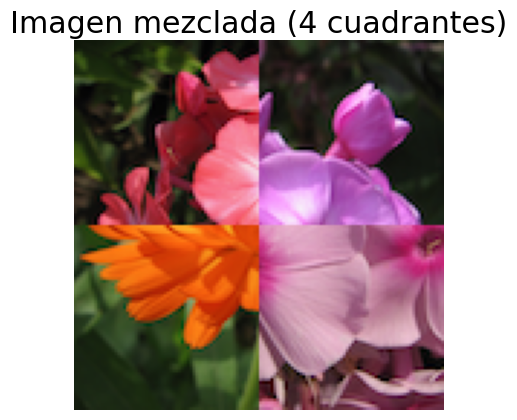

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convertimos PIL a numpy arrays
img1 = np.array(images[0])
img2 = np.array(images[1])
img3 = np.array(images[2])
img4 = np.array(images[3])

# Aseguramos que todas sean del mismo tamaño
h, w, c = img1.shape  # 128, 128, 4 (RGBA)

# Creamos una imagen vacía
mixed_img = np.zeros_like(img1)

# Copiamos cuadrantes
mixed_img[:h//2, :w//2]     = img1[:h//2, :w//2]     # arriba izquierda
mixed_img[:h//2, w//2:]     = img2[:h//2, w//2:]     # arriba derecha
mixed_img[h//2:, :w//2]     = img3[h//2:, :w//2]     # abajo izquierda
mixed_img[h//2:, w//2:]     = img4[h//2:, w//2:]     # abajo derecha

# Mostrar resultado
plt.imshow(mixed_img)
plt.title("Imagen mezclada (4 cuadrantes)")
plt.axis('off')
plt.show()


# Preprocesamiento de los datos

In [ ]:
# Lista para guardar la info de cada imagen
resumen = []

# Iteramos sobre cada archivo de imagen
for idx, path in enumerate(image_files):
    try:
        img = Image.open(path)
        img_array = np.array(img)

        # Tamaño y canales
        shape = img_array.shape
        height = shape[0]
        width = shape[1]
        channels = 1 if len(shape) == 2 else shape[2]

        # Tipo y rango
        dtype = img_array.dtype
        valor_min = img_array.min()
        valor_max = img_array.max()

        resumen.append({
            'Nombre': os.path.basename(path),
            'Índice': idx,
            'Tamaño': f"{width}x{height}",
            'Canales': channels,
            'Tipo de dato': str(dtype),
            'Mínimo': valor_min,
            'Máximo': valor_max
        })

    except Exception as e:
        print(f"⚠️ Error con imagen {path}: {e}")

# Convertimos a DataFrame si aún no lo hiciste
df_resumen = pd.DataFrame(resumen)

# Agrupamos por Tamaño, Canales, Tipo de dato
tabla_rango = df_resumen.groupby(['Tamaño', 'Canales', 'Tipo de dato']).agg(
    Cantidad=('Nombre', 'count'),
    Mínimo_global=('Mínimo', 'min'),
    Máximo_global=('Máximo', 'max')
).reset_index()

# Mostramos la tabla resumen final
display(tabla_rango)


NameError: name 'image_files' is not defined

In [ ]:
def redimensionar_si_necesario(rutas, tamaño=(128, 128)):
    """
    Redimensiona y sobrescribe imágenes que no tengan el tamaño especificado.

    Parámetros:
        rutas (list): Lista de rutas de imágenes.
        tamaño (tuple): Tamaño deseado (ancho, alto), por defecto (128, 128).
    """
    for ruta in rutas:
        img = Image.open(ruta)
        if img.size != tamaño:
            print(f"Redimensionando: {ruta}")
            img = img.resize(tamaño)
            img.save(ruta)
            print(f"Sobrescrita y redimensionada: {ruta}")
        else:
            print(f"No es necesario redimensionar: {ruta}")


redimensionar_si_necesario(image_files)


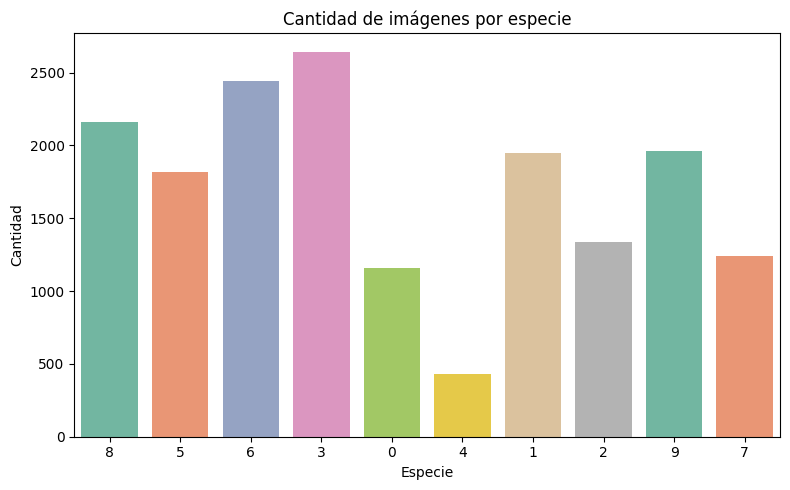

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_flores, x='especie', order=df_flores['especie'].value_counts().index, palette="Set2")
plt.title("Cantidad de imágenes por especie")
plt.xlabel("Especie")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()


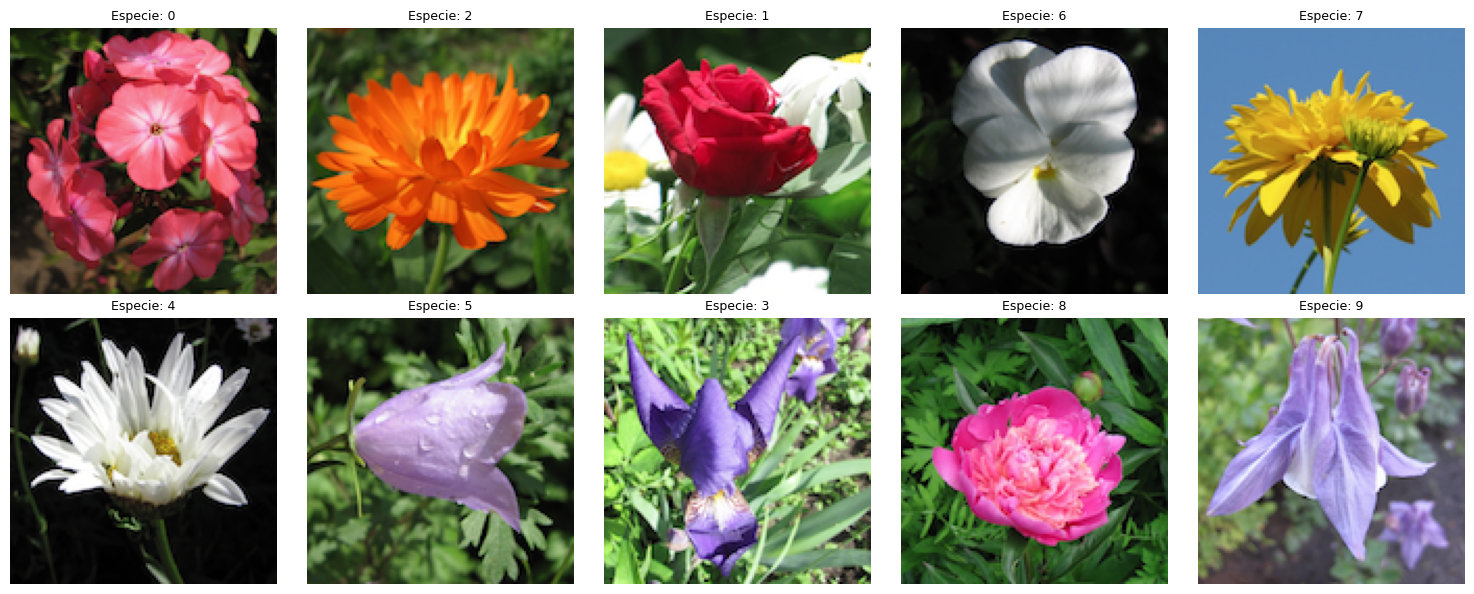

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

# Obtener todas las especies únicas
especies_unicas = df_flores['especie'].unique()

# Calcular número de filas necesarias (4 imágenes por fila)
cols = 5
rows = math.ceil(len(especies_unicas) / cols)

# Crear figura
fig, axs = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))

# Aplanar axs si hay una sola fila
axs = axs.flatten() if rows > 1 else axs

for i, especie in enumerate(especies_unicas):
    # Tomar una imagen de esta especie
    ejemplo = df_flores[df_flores['especie'] == especie].iloc[0]
    ruta = os.path.join(image_path, ejemplo.imagen_de_flor)
    img = Image.open(ruta)

    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(f"Especie: {especie}", fontsize=9)

# Ocultar los ejes vacíos si sobran
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()






# Referencias

In [ ]:
#https://erdogant.github.io/clustimage/pages/html/Examples.html
#https://github.com/erdogant/clustimage?tab=readme-ov-file
#https://pypi.org/project/clustimage/1.3.3/
#https://scikit-image.org/skimage-tutorials/lectures/1_image_filters.html